In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Enter the NACA airfoil series: 
4412
Enter the number of Fourier series components: 
12
Enter the number of discretized points: 
100
Enter the angle of attack: 
2
A_ 0  value is -0.009320711078221555
A_ 1  value is 0.16632427785174397
A_ 2  value is 0.02838628086848422
A_ 3  value is 0.00887597072084825
A_ 4  value is -0.0035449913504861374
A_ 5  value is 0.0003642467094368959
A_ 6  value is 0.0016224591934828987
A_ 7  value is 0.0051031060934518535
A_ 8  value is 0.0006864032389936017
A_ 9  value is 0.002279050507897977
A_ 10  value is 0.00030943879071538465
A_ 11  value is 0.003916192595389549
A_ 12  value is 0.0011105820942173728
cl from Camber problem is  0.6832839167599489
cm_c/4 from Camber problem is  -0.10833624949337498


<ipython-input-3-2508ea6e332d>:113: RuntimeWarning: divide by zero encountered in double_scalars
  gammac = 2*V*self.An[0]*(1+np.cos(theta))/np.sin(theta)
<ipython-input-3-2508ea6e332d>:116: RuntimeWarning: divide by zero encountered in double_scalars
  gammac = gammac + 2*V*self.AoA*np.pi/180*(1+np.cos(theta))/np.sin(theta)
<ipython-input-3-2508ea6e332d>:116: RuntimeWarning: invalid value encountered in double_scalars
  gammac = gammac + 2*V*self.AoA*np.pi/180*(1+np.cos(theta))/np.sin(theta)


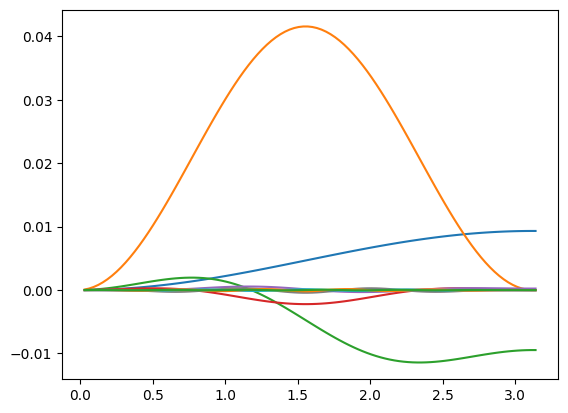

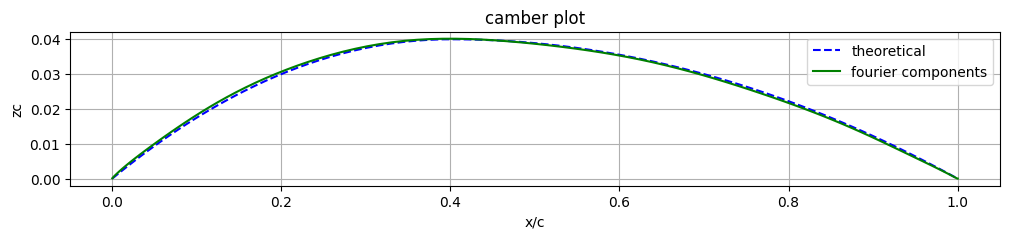

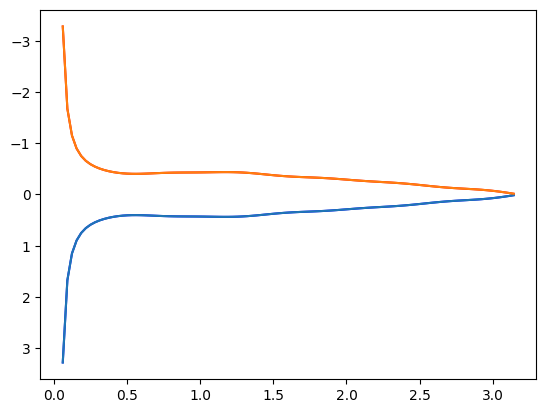

In [ ]:
class airfoil(object):
      """ Template class for specifying airfoil

          The constructor contains the parameters required to define airfoil geometry
          and parameters with which we wish to solve the flow using thin air foil theory

      """

      def __init__(self, airfoil, nSrs, nPrs,AoA):
          # theta : angle is initialized
          theta=0.0

          # nPrs : Number of segments the chordline is divided into
          self.nPrs = nPrs

          # AoA : Angle of Attack
          self.AoA = AoA

          # nSrs : Number of Fourier coefficient to be calculated
          self.nSrs = nSrs

          # dtheta : Elemental change in angle
          self.dtheta=np.pi/self.nPrs

          # airfoil : contains digits of NACA 4 digit airfoil
          # NACA digits are converted into string to use individual digits to calculate geometric parameters
          str_a=str(airfoil)

          # In order to avoid unnecessary calculation if symmetric airfoil is given as input calculation for camber are not done
          if (int(str_a[0]) == 0 & int(str_a[1]) == 0):

          # Symmetric airfoil is founf then excute1 method is used with less number of calculations
              self.execute1()

          else:

          # Lenght of string is checked and if 4 digits are there calculating the geometric parameters
              if(len(str_a)==4):

          # m : maximum camber of input airfoil
          # p : location of maximum camber of input airfoil
          # thetap : location of maximum camber in polar coordinate
                  self.m=int(str_a[0])/100
                  self.p=int(str_a[1])/10
                  self.thetap=np.arccos(1-2*self.p)

          # If four digit profile is found then execute method is used for further solving
              self.execute()


          # fourier method is defined to calculate required number of fourier coefficients
      def fourier(self):

          #local variable defined to used in integration
          A=0

          # v : free stream velocity
          V=1

          # An : Array is intialized that will contain all the fourier coefficients with correspondinf indices
          self.An=[]

          # theta is used for calculation of in loop
          theta = 0

          # integratios is done using for loop to calculate nSrs fourier coefficients
          for i in range(self.nSrs):
              while(theta<=np.pi):

          # If condition is used to identify required formula to calculate dZc/dx
                  if(theta<=self.thetap):

          # If theta < thetap ==> x < p hence dZc/dx = (2*m/p^2)*(p-x)
                       dzc_dx=self.m*(2*self.p-1+np.cos(theta))/self.p**2
                  else:

          # If theta > thetap ==> x > p hence dZc/dx = (2*m/(1-p)^2)*(p-x)
                       dzc_dx=self.m*(2*self.p-1+np.cos(theta))/(1-self.p)**2

          # dA : common integral term in all coefficient i.e. dA = dZc/dx*cos(theta)*dtheta
                  dA=dzc_dx*np.cos(i*theta)*self.dtheta
                  if(i==0):
          # Element of fourier coefficient is calculated using dA and appropriate coefficient
                       dAn=dA*(-1/np.pi)
                  else:
                       dAn=dA*2/np.pi
                  A=A+dAn
                  theta=theta+self.dtheta

          # 'An' stores the coefficient after integration
              self.An.append(A)
              theta=0
              A=0



          # Elements are printed
              print("A_",i," value is",self.An[i])

          # method is defined to calculate circulation distribution and hence coefficient of pressure from that
      def circulationandcp(self):

          # Arrays initialize for pressure coefficient on upper surface, lower surface and gamma
          self.cp_u = []
          self.cp_l = []
          self.theta2=[]
          self.gamma_theta = []
          theta=0
          V = 1

          #single loop is use to calculate gamma using a temporary variable gammac and Cp are also calculated simultaneoulsy
          while theta<=(np.pi-self.dtheta):
               gammac = 2*V*self.An[0]*(1+np.cos(theta))/np.sin(theta)
               for i in range(self.nSrs-1):
                   gammac = gammac + 2*V*self.An[i+1]*np.sin((i+1)*theta)
               gammac = gammac + 2*V*self.AoA*np.pi/180*(1+np.cos(theta))/np.sin(theta)
               cp_u0=-gammac/V
               cp_l0=gammac/V
               self.gamma_theta.append(gammac)
               self.cp_u.append(cp_u0)
               self.cp_l.append(cp_l0)
               self.theta2.append(theta)
               theta = theta + self.dtheta


          # Lift coefficient Cl and coefficient of moment at aerodynamic centre are
          # calculated using angle of attack and fourier coeficcient from formula
          # derived in thin air foil theory
          cl=2*np.pi*self.AoA*np.pi/180+np.pi*(2*self.An[0] + self.An[1])
          cmc_4 = -np.pi/4*(self.An[1] - self.An[2])

          # Printing lift coeff and moment coeff about c/4
          print("cl from Camber problem is ", cl)
          print("cm_c/4 from Camber problem is ", cmc_4)

          # Array of x cooerdinate for corresponding theta of cosine distribution
      def thetaarray(self):
          self.theta1=[]
          theta=0
          self.x5=[]

          while(theta<=(np.pi-self.dtheta)):
               theta=theta+self.dtheta
               dxx=0.5*(1-np.cos(theta))
               self.theta1.append(theta)
               self.x5.append(dxx)



          # Camber function is calculated using theoretically known function for comparison
      def theoreticalcamber(self):
          self.zc2=[]
          x1=[]
          for k in range(self.nPrs):
              if(self.x5[k]<=self.p):
                   zc=(self.m*(2*self.p*self.x5[k]-self.x5[k]**2)/self.p**2)
                   self.zc2.append(zc)
              elif(self.x5[k]>self.p):
                   zc = (self.m*(1-2*self.p+2*self.p*self.x5[k]-self.x5[k]**2)/(1-self.p)**2)
                   self.zc2.append(zc)




          # Camber function is calculated using fourier components for comparison
      def practicalcamber(self):
          self.zc_=[]
          z=0
          zc1=0
          theta=0
          self.cmbr=[]
          sum=0
          for i in range(self.nSrs):
              zc0=[]
              for j in range(len(self.theta1)):
                  z=0
                  theta=0
                  while(theta<=self.theta1[j]):
                       if i==0:
                          zc1 =zc1 + (-1)*self.An[i]*0.5*np.sin(theta)*self.dtheta
                       else:
                          zc1 =zc1 + self.An[i]*0.5*np.cos(i*theta)*np.sin(theta)*self.dtheta
                       theta=theta+self.dtheta
                  zc0.append(zc1)
                  zc1=0
              self.zc_.append(zc0)
              plt.plot(self.theta1,zc0)
          for i in range(self.nPrs):
              for j in range(self.nSrs-1):
                  sum=sum+self.zc_[j][i]
              self.cmbr.append(sum)
              sum=0



          # This method is created to avoid unnecessary calculation for symmetric airfoil
          # Cp,Cl are calculated directly using AoA problem
      def symmetric(self):
          # printing circulation density at discretized points
          self.cp_u = []
          self.cp_l = []
          self.theta2=[]
          self.gamma_theta = []
          theta=self.dtheta
          V = 5
          # An = []
          while theta<=(np.pi-self.dtheta):
                gammac = 2*V*self.AoA*np.pi/180*(1+np.cos(theta))/np.sin(theta)
                cp_u0=-gammac/V
                cp_l0=gammac/V
                self.gamma_theta.append(gammac)
                self.cp_u.append(cp_u0)
                self.cp_l.append(cp_l0)
                self.theta2.append(theta/np.pi)
                theta = theta + self.dtheta
          cl = 2*np.pi*self.AoA*np.pi/180
          cmc_4 = 0

          # Printing lift coeff and moment coeff about c/4
          print("cl from Camber problem is ", cl)
          print("cm_c/4 from Camber problem is ", cmc_4)



          #Plotting coefficient of pressure on upper and lower surface for cambered airfoil
      def plot(self):

          plt.figure(figsize=(12,2))  # Optional: Set the figure size
          plt.plot(self.x5, self.zc2, label='theoretical', color='blue', linestyle='--')
          plt.plot(self.x5, self.cmbr, label='fourier components', color='green', linestyle='-')
          # Plot the curve
          plt.title('camber plot')  # Set the title of the plot
          plt.xlabel('x/c')  # Label for the x-axis
          plt.ylabel('zc')  # Label for the y-axis
          plt.grid(True)  # Display a grid
          plt.legend()  # Display a legend

          fig, ax = plt.subplots()
          # Create the plot
          plt.gca().invert_yaxis()
          plt.plot(self.theta1 , self.cp_l , color='blue')
          plt.plot(self.theta1 , self.cp_u ,color='red')

          # Plot the data and specify labels
          ax.plot(self.theta1, self.cp_l, label='Cp_lower')
          ax.plot(self.theta1, self.cp_u, label='Cp_upper')
          plt.show()

          # Add a legend to the plot
          ax.legend()

          # Plotting coefficient of pressure for symmertric airfoil
      def plot1(self):

          fig, ax = plt.subplots()
          # Create the plot
          plt.gca().invert_yaxis()
          plt.plot(self.theta1 , self.cp_l , color='blue')
          plt.plot(self.theta1 , self.cp_u ,color='red')

          # Plot the data and specify labels
          ax.plot(self.theta1, self.cp_l, label='Cp_lower')
          ax.plot(self.theta1, self.cp_u, label='Cp_upper')
          plt.show()

          # Add a legend to the plot
          ax.legend()



          # method containing list of methods to be used for cambered airfoil
      def execute(self):

          self.fourier()
          self.thetaarray()
          self.circulationandcp()
          self.theoreticalcamber()
          self.practicalcamber()
          self.plot()
          # method containing list of methods to be used for symmetric airfoil
      def execute1(self):

          self.thetaarray()
          self.symmetric()
          self.plot1()

# Inputs taken from user to be used as attributes for class defined

print("Enter the NACA airfoil series: ")
str_a=input()
print("Enter the number of Fourier series components: ")
nSrs=int(input())
print("Enter the number of discretized points: ")
nPrs=int(input())
print("Enter the angle of attack: ")
AoA=int(input())
airfoil(str_a,nSrs+1,nPrs,AoA)

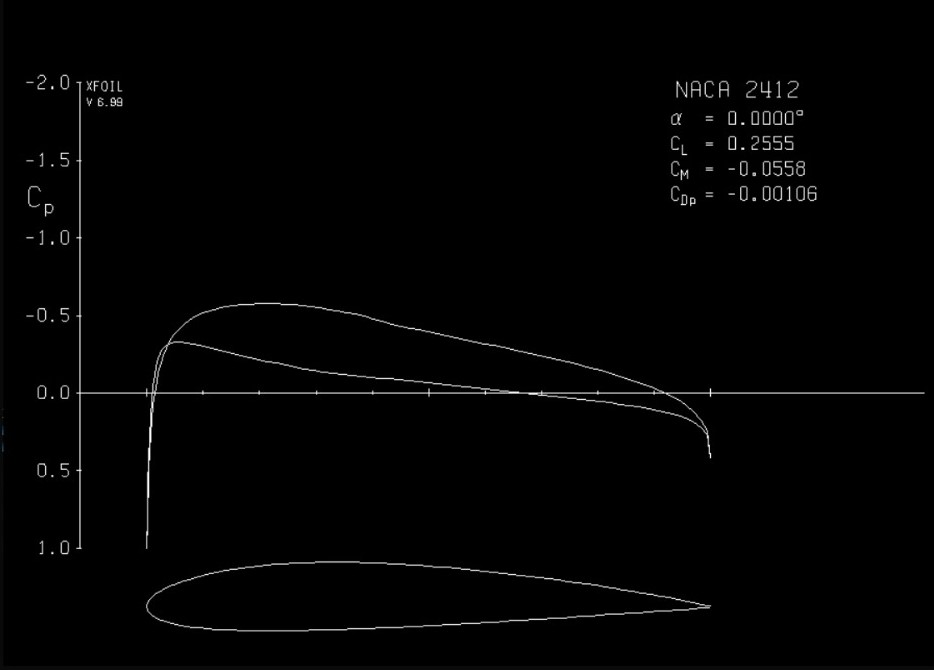

A_ 0  value is -0.004660355539110777
A_ 1  value is 0.08316213892587199
A_ 2  value is 0.01419314043424211
A_ 3  value is 0.004437985360424125
A_ 4  value is -0.0017724956752430687
A_ 5  value is 0.00018212335471844794
A_ 6  value is 0.0008112295967414493
A_ 7  value is 0.0025515530467259268
A_ 8  value is 0.00034320161949680087
A_ 9  value is 0.0011395252539489885
cl from Camber problem is  0.7802910428728347
cm_c/4 from Camber problem is  -0.05416812474668749


<ipython-input-3-2508ea6e332d>:113: RuntimeWarning: divide by zero encountered in double_scalars
  gammac = 2*V*self.An[0]*(1+np.cos(theta))/np.sin(theta)
<ipython-input-3-2508ea6e332d>:116: RuntimeWarning: divide by zero encountered in double_scalars
  gammac = gammac + 2*V*self.AoA*np.pi/180*(1+np.cos(theta))/np.sin(theta)
<ipython-input-3-2508ea6e332d>:116: RuntimeWarning: invalid value encountered in double_scalars
  gammac = gammac + 2*V*self.AoA*np.pi/180*(1+np.cos(theta))/np.sin(theta)


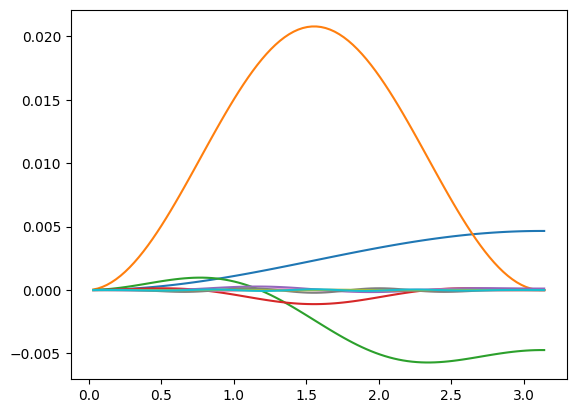

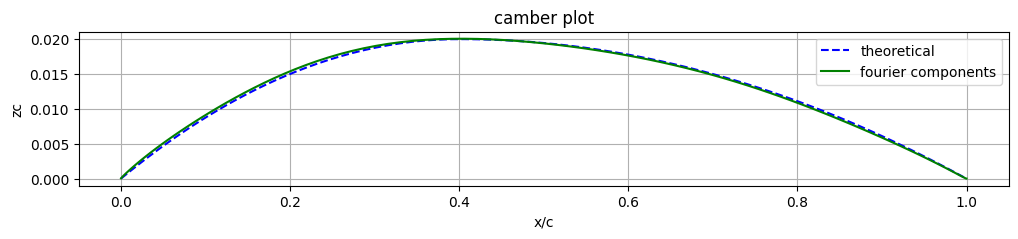

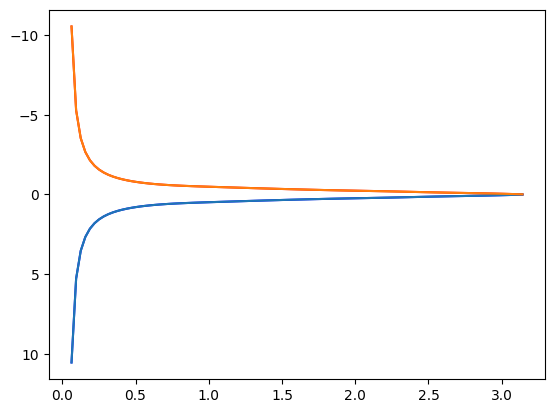

Enter the left bottom most x co-ordinate of grid
-2
Enter the left bottom most y co-ordinate of grid
-2
Enter the right top most x co-ordinate of grid
2
Enter the right top most y co-ordinate of grid
2


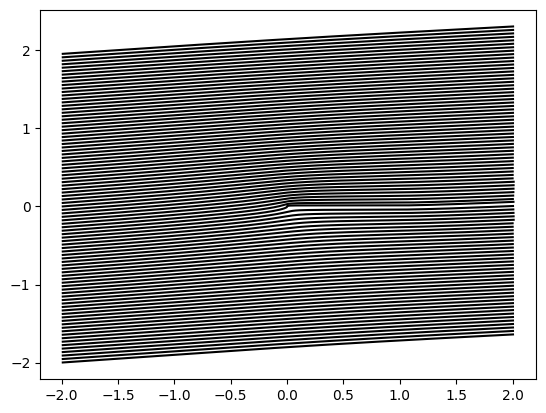

In [ ]:

# a separate driver routine is made to plot streamlines
a = airfoil("2412",10,100,5)
class streamline(object):
      def __init__(self,b):
          print("Enter the left bottom most x co-ordinate of grid")
          x0=int(input())
          print("Enter the left bottom most y co-ordinate of grid")
          z0=int(input())
          print("Enter the right top most x co-ordinate of grid")
          x_=int(input())
          print("Enter the right top most y co-ordinate of grid")
          z_=int(input())

          zy=[]
          v=5
          self.b  = a
          #self.b.AoA= 10
          gammax=[]
          for i in range(len(self.b.x5)):
              gamma1=2*self.b.AoA*np.pi/180*v*np.sqrt((self.b.x5[len(self.b.x5)-1]-self.b.x5[i])/self.b.x5[i])

              gammax.append(gamma1)
              zy.append(self.b.x5[i])
          # print(len(zy))
          # print(len(gammax))
          x=x0
          z=z0
          u1=0
          w1=0
          i=0
          x1=[]
          z1=[]
          zf =(z_-z)/90
          z2 = z0
          ds=0.01
          while(z <= z_):
                while(x<=x_):
                      while(zy[i]<=zy[len(zy)-2]):
                           if(zy[i]==zy[len(zy)-1]):
                               dzy=0.001
                           else:
                               dzy=zy[i+1]-zy[i]
                           du=gammax[i]/(2*np.pi)*(z*dzy/((x-zy[i])**2+z**2))
                           dw=-1*gammax[i]/(2*np.pi)*(x-zy[i])*dzy/((x-zy[i])**2+z**2)
                           u1=u1+du
                           w1=w1+dw
                           i=i+1
                      U=u1+v*np.cos(self.b.AoA*np.pi/180)
                      W=w1+v*np.sin(self.b.AoA*np.pi/180)
                      thetax=np.arctan(W/U)
                      x=x+ds*np.cos(thetax)
                      z=z+ds*np.sin(thetax)
                      w1=0
                      u1=0
                      i=0
                      x1.append(x)
                      z1.append(z)
                      # print(len(x1))
                      # print(len(z1))

                plt.plot(x1,z1, color = 'black')
                z = z2 + zf
                z2 = z2 + zf
                x1=[]
                z1=[]

                x=x0


b = streamline(a)



